<a href="https://colab.research.google.com/github/Yogs005/AIRBNB-Capstone-Project/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/alma datasets/Copy of NYC Taxi Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.store_and_fwd_flag.value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [ ]:
df.corr()['trip_duration']

vendor_id            0.020304
passenger_count      0.008471
pickup_longitude     0.026542
pickup_latitude     -0.029204
dropoff_longitude    0.014678
dropoff_latitude    -0.020677
trip_duration        1.000000
Name: trip_duration, dtype: float64

In [ ]:
df.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [ ]:
df[df.duplicated()].count()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.drop(df.loc[df['passenger_count']==0].index,inplace=True)

In [ ]:
df.loc[df['passenger_count']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


In [ ]:
df.drop(columns='id',inplace=True)

In [ ]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [ ]:
df['dist_trav'] = df.apply( lambda x: haversine_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_trav
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.50
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.81
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.39
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.49
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.19


In [ ]:
df['pickup_datetime']=pd.to_datetime(df.pickup_datetime, format='%Y-%m-%d %H:%M:%S')
df['dropoff_datetime']=pd.to_datetime(df.dropoff_datetime,format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [ ]:
def month(m):
  r= m.strftime("%B")
  return str(r)

df['pickup_month']=df['pickup_datetime'].apply(lambda x: month(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))
df['dropoff_month']=df['dropoff_datetime'].apply(lambda x: month(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))

In [ ]:
def timezone(t):
  if t>=dt.time(4,00,00)and t<=dt.time(5,59,59):
    return 'Early Morning'
  elif t>=dt.time(6,00,00) and t<=dt.time(11,59,59):
    return 'Morning'
  elif t>=dt.time(12,00,00) and t<=dt.time(15,59,59):
    return 'Afternoon'
  elif t>=dt.time(16,00,00) and t<=dt.time(20,59,59):
    return 'Evening'
  elif t>=dt.time(21,00,00) or t<=dt.time(3,59,59):
    return 'Night'
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x: timezone(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x: timezone(dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').time()))

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_trav,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.50,Monday,Monday,January,January,Evening,Evening
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.81,Sunday,Sunday,January,January,Night,Night
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.39,Tuesday,Tuesday,January,January,Morning,Afternoon
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.49,Wednesday,Wednesday,January,January,Evening,Evening
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.19,Saturday,Saturday,January,January,Afternoon,Afternoon


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


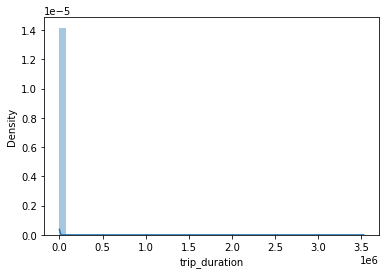

In [ ]:
sns.distplot(df['trip_duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


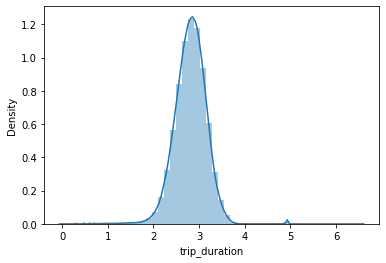

In [ ]:
sns.distplot(np.log10(df['trip_duration']))

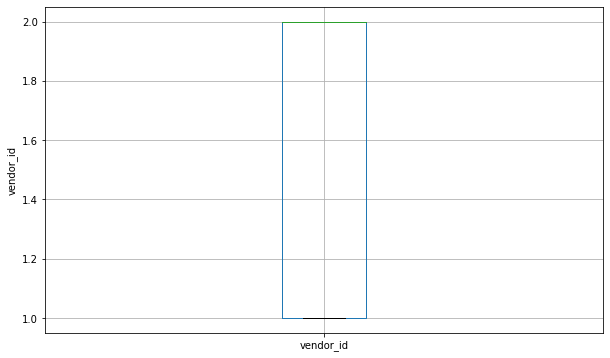

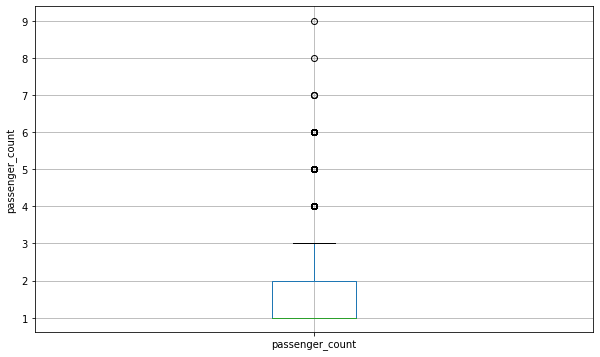

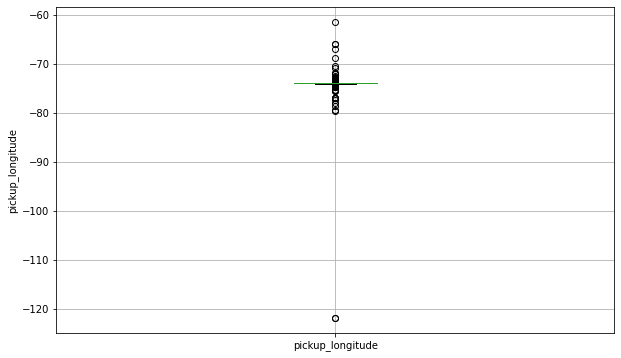

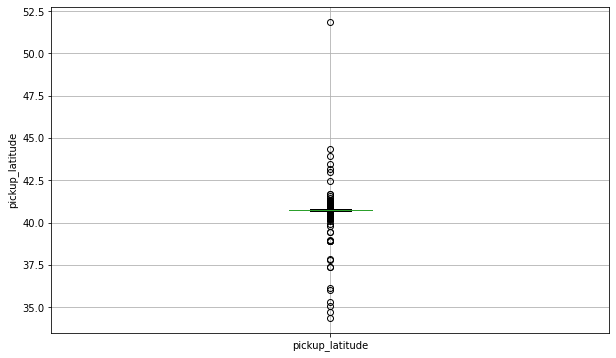

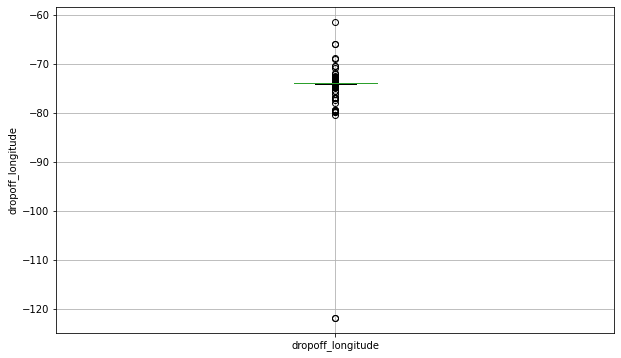

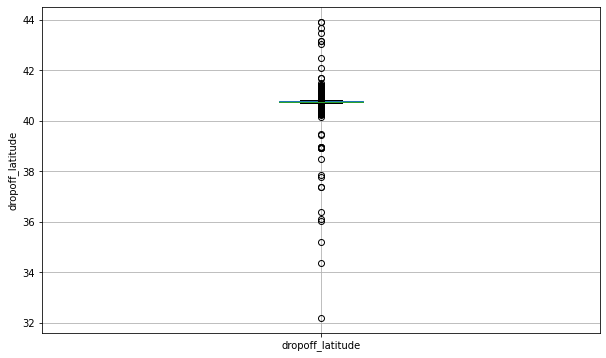

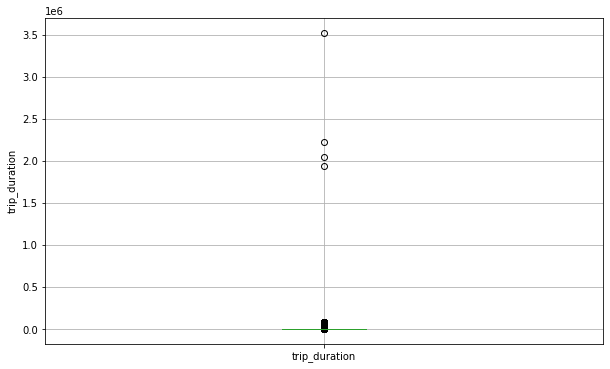

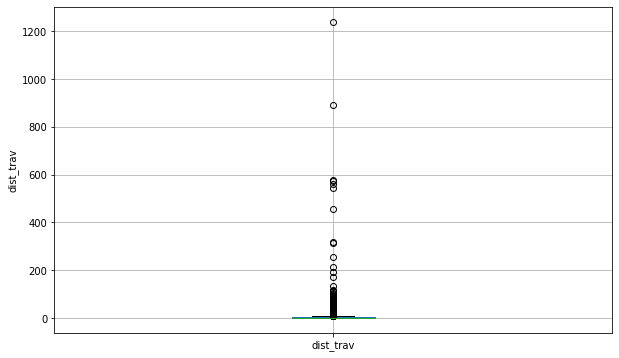

In [ ]:
for col in df.describe().columns:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  df.boxplot(column = col,ax=ax)
  ax.set_ylabel(col)
plt.show()

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_trav,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_timezone,dropoff_timezone
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.50,Monday,Monday,January,January,Evening,Evening
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.81,Sunday,Sunday,January,January,Night,Night
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.39,Tuesday,Tuesday,January,January,Morning,Afternoon
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.49,Wednesday,Wednesday,January,January,Evening,Evening
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.19,Saturday,Saturday,January,January,Afternoon,Afternoon


In [ ]:
df = pd.get_dummies(data=df,columns=['store_and_fwd_flag','pickup_day','dropoff_day','pickup_month','dropoff_month','pickup_timezone','dropoff_timezone']
                    ,drop_first=True)

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_trav,store_and_fwd_flag_Y,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_timezone_Early Morning,pickup_timezone_Evening,pickup_timezone_Morning,pickup_timezone_Night,dropoff_timezone_Early Morning,dropoff_timezone_Evening,dropoff_timezone_Morning,dropoff_timezone_Night
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.50,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.81,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.39,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.49,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.19,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.corr()['trip_duration']

vendor_id                         0.020296
passenger_count                   0.008480
pickup_longitude                  0.026515
pickup_latitude                  -0.029175
dropoff_longitude                 0.014650
dropoff_latitude                 -0.020649
trip_duration                     1.000000
dist_trav                         0.094790
store_and_fwd_flag_Y              0.001730
pickup_day_Monday                -0.004542
pickup_day_Saturday              -0.000917
pickup_day_Sunday                -0.004337
pickup_day_Thursday               0.003776
pickup_day_Tuesday                0.001843
pickup_day_Wednesday              0.001253
dropoff_day_Monday               -0.000394
dropoff_day_Saturday             -0.004445
dropoff_day_Sunday               -0.001511
dropoff_day_Thursday              0.002328
dropoff_day_Tuesday              -0.001038
dropoff_day_Wednesday             0.002559
pickup_timezone_Early Morning    -0.002407
pickup_timezone_Evening           0.000738
pickup_time

In [ ]:
df.shape

(1458584, 31)

In [ ]:
df['trip_duration'] = np.log10(df['trip_duration'])

In [ ]:
df.corr()['trip_duration']

vendor_id                         0.019848
passenger_count                   0.020943
pickup_longitude                  0.110418
pickup_latitude                  -0.144296
dropoff_longitude                 0.071473
dropoff_latitude                 -0.123400
trip_duration                     1.000000
dist_trav                         0.572264
store_and_fwd_flag_Y              0.015298
pickup_day_Monday                -0.019469
pickup_day_Saturday              -0.025344
pickup_day_Sunday                -0.044017
pickup_day_Thursday               0.032384
pickup_day_Tuesday                0.012378
pickup_day_Wednesday              0.023973
dropoff_day_Monday               -0.018113
dropoff_day_Saturday             -0.025618
dropoff_day_Sunday               -0.040765
dropoff_day_Thursday              0.030694
dropoff_day_Tuesday               0.011519
dropoff_day_Wednesday             0.023744
pickup_timezone_Early Morning    -0.033363
pickup_timezone_Evening           0.014081
pickup_time

In [ ]:
df.drop(columns=['pickup_datetime','dropoff_datetime'],axis=1,inplace=True)

In [ ]:

p_1=np.percentile(df['dist_trav'],25)
p_3=np.percentile(df['dist_trav'],75)
iqr=p_3-p_1
low_lim=p_1-1.5*iqr
up_lim=p_3+1.5*iqr
df=df[df['dist_trav']>low_lim]
df=df[df['dist_trav']<up_lim]

df.shape


(1318242, 29)

In [ ]:
p_1=np.percentile(df['passenger_count'],25)
p_3=np.percentile(df['passenger_count'],75)
iqr=p_3-p_1
low_lim=p_1-1.5*iqr
up_lim=p_3+1.5*iqr
df=df[df['passenger_count']>low_lim]
df=df[df['passenger_count']<up_lim]

df.shape

(1178905, 29)

In [ ]:
p_1=np.percentile(df['trip_duration'],25)
p_3=np.percentile(df['trip_duration'],75)
iqr=p_3-p_1
low_lim=p_1-1.5*iqr
up_lim=p_3+1.5*iqr
df=df[df['trip_duration']>low_lim]
df=df[df['trip_duration']<up_lim]

df.shape

(1161152, 29)

In [ ]:
x = df.drop(columns=['trip_duration'],axis=1)

In [ ]:
y = df['trip_duration']

In [ ]:
x.shape

(1161152, 28)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.23,random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(x_train,y_train)
preds = rfr.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,preds))
r2 = r2_score(y_test,preds)
print(f"RMSE is: {RMSE}")
print(f"R2 = {r2}")
adj_r2 = 1-(1-rfr.score(x,y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print(adj_r2)


RMSE is: 0.15671368654986406
R2 = 0.6820551893944586
0.882848375642256


In [ ]:
rfr.score(x_train,y_train)

0.9428539134004902

In [45]:
from sklearn.ensemble import AdaBoostRegressor

In [52]:
aboost_reg = AdaBoostRegressor(n_estimators=30)

In [53]:
aboost_reg.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=30)

In [54]:
aboost_pred = aboost_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,aboost_pred))
print(f"RMSE: {rmse}")
r2 = r2_score(y_test,aboost_pred)
print(f"R2: {r2}")
adj_r2 = 1-(1-aboost_reg.score(x,y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"adj_r2: {adj_r2}")

RMSE: 0.19141068237464234
R2: 0.5256813188900797
adj_r2: 0.5263440940350841


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [72]:
gb_reg = GradientBoostingRegressor(n_estimators=20,max_depth=4)

In [73]:
gb_reg.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=20)

In [74]:
gb_preds = gb_reg.predict(x_test)

In [75]:
rmse = np.sqrt(mean_squared_error(y_test,gb_preds))
print(f"RMSE: {rmse}")
r2 = r2_score(y_test,gb_preds)
print(f"R2: {r2}")
adj_r2 = 1-(1-gb_reg.score(x,y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"adj_r2: {adj_r2}")

RMSE: 0.1801458483278968
R2: 0.5798673801856363
adj_r2: 0.5797924299417356


In [76]:
gb_reg.score(x_train,y_train)

0.5797824976267407

In [78]:
aboost_reg.score(x_train,y_train)

0.5265561981012288

In [79]:
rfr.score(x_train,y_train)

0.9428539134004902